In [2]:
import glob
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
path_to_data = '../data/train/XR_HAND_CENTRED_CLEANED/*/*/*'
XR_HAND_CENTRED_CLEANED = '../data/train/XR_HAND_CENTRED_CLEANED/'
XR_HAND_PHOTOSHOP_1 = '../data/train/XR_HAND_PHOTOSHOP_1/'

In [3]:
paths = glob.glob(path_to_data)

In [4]:
paths.sort(key=os.path.getmtime)
processed = paths[::-1][:38]

In [5]:
import re
from shutil import copyfile

In [6]:
for file in processed:
    new_file = re.sub('XR_HAND_CENTRED_CLEANED', 'XR_HAND_PHOTOSHOP_1', file)
    os.makedirs(re.sub('image[0-9]_.+\.png', '', new_file), exist_ok=True)
    copyfile(file, new_file)

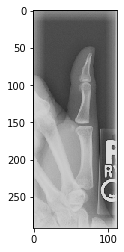

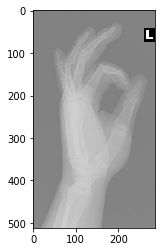

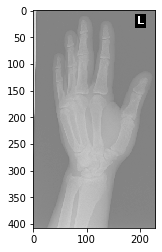

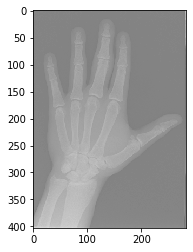

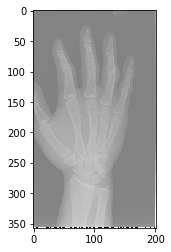

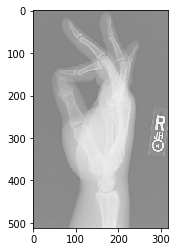

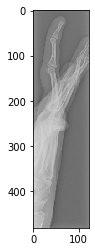

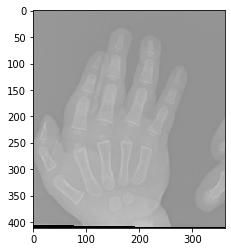

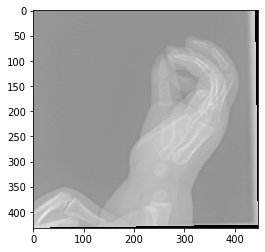

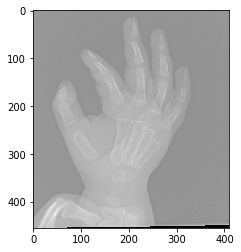

In [7]:
threshold = 255/2
for path in paths: 
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    color = np.array([img[0:50, 0:50].mean(), img[-50:, -50:].mean(),
                     img[:50, -50:].mean(), img[-50:, :50].mean()]).mean()
    if color > threshold:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.show()
        cv2.imwrite(path, 255 - img)